# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 1384 Камынин Александр Александрович и Кондратенко Константин Евгеньевич. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. 

## Основные теоретические положения

- Дискретный нерекурсивный фильтр - пусть есть входной детерминированный сигнал $ x(n) $. Тогда данный фильтр - это формула, описывающая последовательность чисел $ y_n $ - выходного сигнала, одна из возможных форм которого может быть представлена как: $$ y_n = \sum_{k=0}^{m} c_k x_{n-k} $$

- Передаточная функция - представление поведения системы, описывающее, как входной сигнал преобразуется в выходной. Для нерекурсивного фильтра передаточная функция вычисляется следующим образом: $$ H(w) = \frac{y_n}{x_n} $$
    В случае, если сигнал гармонический дискретный, функция примет вид: $$ H(w) = \frac{ \sum_{k=0}^{m} c_k e^{i\omega(n-k)} }{ e^{iwn} } = \sum_{k=0}^{m} c_k e^{-i\omega k} $$

- Круговая и циклическая частоты: $$ \omega = 2 \pi f $$

- Следствие формулы Эйлера для косинуса: $$ e^{ix} + e^{-ix} = 2 \cos(x) $$

- Формулы Спенсера:
    
    Для 15 точек: $ y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} -6 s_{n+6} - 3s_{n+7} ) $

    Для 21 точки: $ y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + ... ) $


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов. 

## Выполнение работы

In [187]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from IPython.display import display, Math

### Задание 1.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть $ s(t) $ - входной сигнал, $ y(t) = A + Bt $ - выходной сигнал. Хотим подобрать такие значения (A, B), чтобы выходной сигнал $ y(t) $ максимально соответствовал значению входного сигнала $ s(t) $ по его $2m+1$ точкам. Для этого будем минимизировать следующую функцию ошибки (проводить приближение в смысле МНК):

$$ F(A, B) = \sum_{k=-m}^{k=m} (s_k - y_k)^2 = \sum_{k=-m}^{k=m} (s_k - A - Bk)^2 \rightarrow min $$

Для того, чтобы найти подходящие значения параметров A и B, найдем частные производные и приравняем к 0:

$$ \begin{cases} \frac{ \delta F(A, B) }{ \delta A } = 0 \\ \frac{ \delta F(A, B) }{ \delta B } = 0 \end{cases} $$

Выразим значения A и B:

$$ \begin{cases} A = \frac{1}{2m + 1} \sum_{k=-m}^{k=m} s_k \\ B = \frac{ \sum_{k=-m}^{k=m} k \cdot s_k }{ \sum_{k=-m}^{k=m} k^2 } \end{cases} $$

Так как хотим сгладить значение в точке n выходного сигнала по входным m точкам, то нас будет интересовать только центральное значение, то есть y(0):

$$ y_n = A + B \cdot 0 = A = \frac{1}{2m + 1} \sum_{k=n-m}^{k=n+m} s_k = \frac{1}{2m + 1} (s_{n-m} + s_{n-m+1} + ... + s_{n} + s_{n+1} + ... + s_{n+m}) $$

Теперь, если $s_n = e^{i \omega n}$, то:

$$ y_n = \frac{1}{2m + 1} ( e^{(n-m) \cdot i \omega } + ... + e^{n \cdot i \omega} + ... e^{(n+m) \cdot i \omega} ) = [\text{вынесем } e^{n \cdot i \omega}] = \frac{1}{2m + 1} ( e^{-m \cdot i \omega} + ... + 1 + ... + e^{m \cdot i \omega} ) e^{n \cdot i \omega} $$

Часть, слева от экспоненты - передаточная функция, которая нас интересует:

$$ H(\omega) = \frac{1}{2m + 1} (e^{-m \cdot i \omega} + ... + 1 + ... + e^{m \cdot i \omega}) $$

Вспомним следствие формулы Эйлера:

$$ e^{ix} + e^{-ix} = 2 \cos(x) $$

Тогда передаточную функцию можно переписать:

$$ H(\omega) = \frac{1}{2m + 1} (1 + 2\cos(\omega) + 2\cos(2\omega) + ... + 2\cos(m\omega) ) $$

Зная, что $ \omega = 2 \pi f $, можно переписать передаточную функцию. Конечная формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 2m+1 точке, примет вид:

$$ \tilde{H}(f) = \frac{1}{2m + 1} (1 + 2\cos(2 \pi f ) + 2\cos(2 \cdot 2 \pi f ) + ... + 2\cos(m \cdot 2 \pi f ) ) $$

In [188]:
t = sp.symbols('t')

def get_yn(model, params: tuple, number_dots: int):
    '''
    model: полином, описывающий выходной сигнал
    params: параметры полинома
    m: количество точек, используемых для приближения
    '''
    
    m = number_dots // 2
    
    k = np.array([i for i in range(-m, m+1)]) # окрестность исследуемой точки
    s = sp.symbols(' '.join([
        f"s_n{'+' if i >= 0 else ''}{i}" for i in range(-m, m+1)
    ]))
    
    # Составим функцию потерь
    F = np.sum([(s_k - model.subs(t, k[idx]))**2 for idx, s_k in enumerate(s)])
    
    # Сосставим норм. уравнения (частные производные = 0)
    equations = [sp.diff(F, param) for param in params]
    solution = sp.solve(equations, params)
    
    yn = model.subs(t, 0)
    yn = yn.subs(solution).factor()
    print(f"Общая формула сглаживания для yn = {model} по {number_dots} точкам имеет вид:")
    latex = sp.latex(yn)
    display(Math(latex))


In [189]:
A, B = sp.symbols('A B')
y = A + B*t
get_yn(model=y, params=(A, B), number_dots=3)
get_yn(model=y, params=(A, B), number_dots=5)
get_yn(model=y, params=(A, B), number_dots=7)
get_yn(model=y, params=(A, B), number_dots=9)

Общая формула сглаживания для yn = A + B*t по 3 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t по 5 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t по 7 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t по 9 точкам имеет вид:


<IPython.core.display.Math object>

Формулы передаточной функции нерекурсивного фильтра, соответствующих сглаживанию прямой линией по 3, 5, 7 и 9 точкам:

Для 3 точек: $ \tilde{H}(f) = \frac{1}{3} (1 + 2\cos(2 \pi f ) ) $

Для 5 точек: $ \tilde{H}(f) = \frac{1}{5} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) ) $

Для 7 точек: $ \tilde{H}(f) = \frac{1}{7} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) ) $

Для 9 точек: $ \tilde{H}(f) = \frac{1}{9} (1 + 2\cos(2 \pi f ) + 2\cos(4 \pi f) + 2\cos(6 \pi f) + 2\cos(8 \pi f) ) $

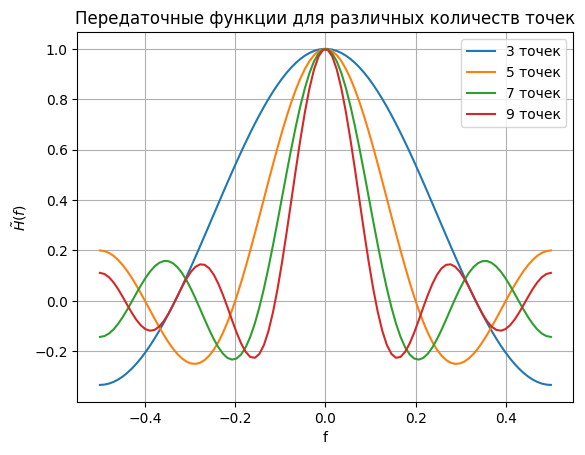

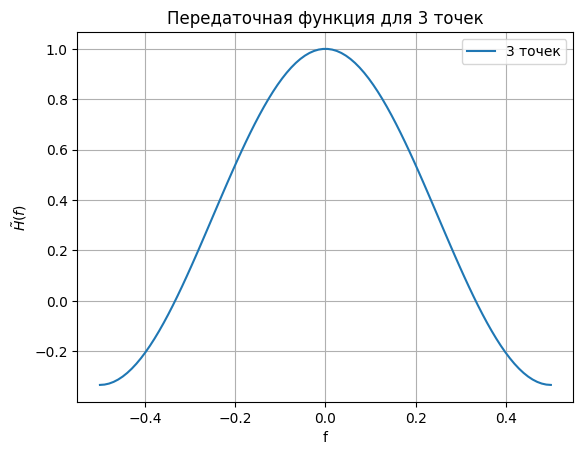

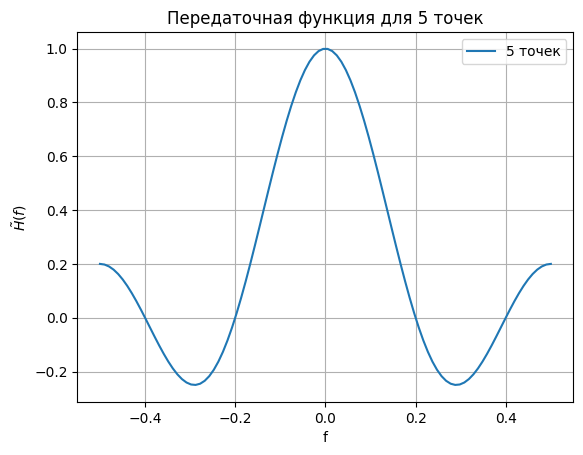

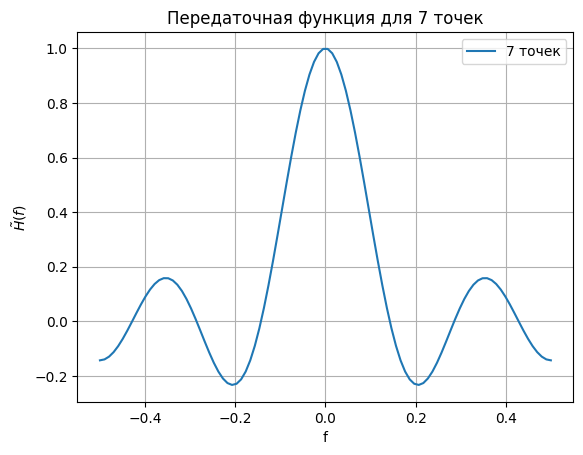

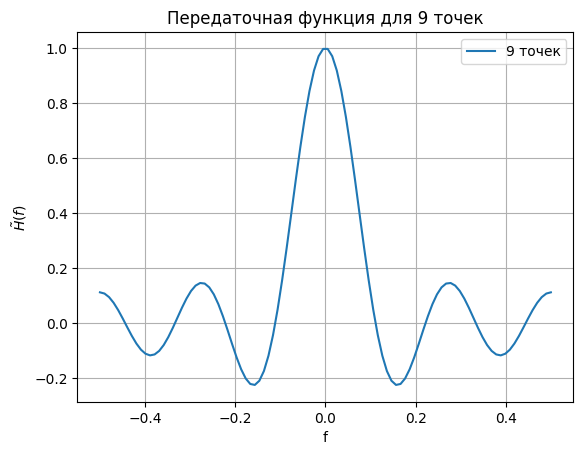

In [190]:
f = sp.symbols('f')

def build_transfer_function(coeffs, number_dots: int):
    '''
    coefficients: коэффициенты для y_n
    number_dots: количество точек, используемых для приближения
    '''
    m = number_dots // 2
    k = np.array([i for i in range(-m, m+1)])
    transfer_function = 0
    
    for idx, k_i in enumerate(k):
        transfer_function += coeffs[idx] * sp.cos(2 * sp.pi * f * np.abs(k_i))
        
    return transfer_function


def plot_log_function(transfer_function, number_dots: int):
    '''
    transfer_function: передаточная функция
    number_dots: количество точек, используемых для приближения
    '''
    f_values = np.linspace(-0.5, 0.5, 100)
    transfer_function_values = [transfer_function.subs(f, f_val) for f_val in f_values]

    plt.figure()
    plt.plot(f_values, transfer_function_values, label=f'{number_dots} точек')
    plt.xlabel('f')
    plt.ylabel(r'$\tilde{H}(f)$')
    plt.title(f'Передаточная функция для {number_dots} точек')
    plt.legend()
    plt.grid(True)


def plot_log_functions(transfer_functions, number_dots_list):
    '''
    transfer_functions: список передаточных функций
    number_dots_list: список количеств точек, используемых для приближения
    '''
    f_values = np.linspace(-0.5, 0.5, 100)

    plt.figure()
    for transfer_function, number_dots in zip(transfer_functions, number_dots_list):
        transfer_function_values = [transfer_function.subs(f, f_val) for f_val in f_values]
        plt.plot(f_values, transfer_function_values, label=f'{number_dots} точек')

    plt.xlabel('f')
    plt.ylabel(r'$\tilde{H}(f)$')
    plt.title('Передаточные функции для различных количеств точек')
    plt.legend()
    plt.grid(True)
    plt.show()


linear_coeffs3 = [1/3, 1/3, 1/3]
linear_coeffs5 = [1/5, 1/5, 1/5, 1/5, 1/5]
linear_coeffs7 = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
linear_coeffs9 = [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
linear_trans_func3 = build_transfer_function(linear_coeffs3, number_dots=3)
linear_trans_func5 = build_transfer_function(linear_coeffs5, number_dots=5)
linear_trans_func7 = build_transfer_function(linear_coeffs7, number_dots=7)
linear_trans_func9 = build_transfer_function(linear_coeffs9, number_dots=9)
transfer_functions = [linear_trans_func3, linear_trans_func5, linear_trans_func7, linear_trans_func9]
number_dots_list = [3, 5, 7, 9]

plot_log_functions(transfer_functions, number_dots_list)
plot_log_function(linear_trans_func3, 3)
plot_log_function(linear_trans_func5, 5)
plot_log_function(linear_trans_func7, 7)
plot_log_function(linear_trans_func9, 9)

3 точки.  
Сглаживание по 3 точкам имеет самый широкий купол основного максимума из представленных в данном задании. Нули: На частотах ±1/3 (в рамках нашего диапазона f).

5 точек.  
Сглаживание по 5 точкам имеет более узкий купол основного максимума. Нули: На частотах ±1/5 и ±2/5 (в рамках нашего диапазона f).

7 точек.  
Сглаживание по 7 точкам имеет еще более узкий купол основного максимума. Нули: На частотах ±1/7, ±2/7, ±3/7 (в рамках нашего диапазона f).

9 точек.  
Сглаживание по 9 точкам имеет наиболее узкий купол основного максимума. Нули: На частотах ±1/9, ±2/9, ±3/9, ±4/9 (в рамках нашего диапазона f).


### Задание 2.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть $ s(t) $ - входной сигнал, $ y(t) = A + Bt + Сt^2 $ - выходной сигнал. Хотим подобрать такие значения (A, B, C), чтобы выходной сигнал $ y(t) $ максимально соответствовал значению входного сигнала $ s(t) $ по его $2m+1$ точкам. Для этого будем минимизировать следующую функцию ошибки (проводить приближение в смысле МНК):

$$ F(A, B) = \sum_{k=-m}^{k=m} (s_k - y_k)^2 = \sum_{k=-m}^{k=m} (s_k - A - Bk - Ck^2)^2 \rightarrow min $$

Для того, чтобы найти подходящие значения параметров A, B, C, найдем частные производные и приравняем к 0.

По аналогии с предыдущим заданием, так как хотим сгладить значение в точке n выходного сигнала по входным m точкам, то нас будет интересовать только центральное значение y(0).

Получим линейную комбинацию входных сигналов, вынесем центральную экспоненту, воспользуемся формулой Эйлера. Получим формулы передаточных функций, представленные ниже (вывод коэффициентов осуществлен в коде программы):

Для 7 точек: $ \tilde{H}(f) = \frac{1}{21} (7 + 12\cos(2 \pi f ) + 6 \cos(4 \pi f) - 4 \cos(6 \pi f) ) $

Для 9 точек: $ \tilde{H}(f) = \frac{1}{231} (59 + 108\cos(2 \pi f ) + 78 \cos(4 \pi f) + 28 \cos(6 \pi f) - 42 \cos(8 \pi f)) $

Для 11 точек: $ \tilde{H}(f) = \frac{1}{429} (89 + 168\cos(2 \pi f ) + 138 \cos(4 \pi f) + 88 \cos(6 \pi f) + 18 \cos(8 \pi f) - 72 \cos(10 \pi f)) $

Для 13 точек: $ \tilde{H}(f) = \frac{1}{143} (25 + 48\cos(2 \pi f ) + 42 \cos(4 \pi f) + 32 \cos(6 \pi f) + 18 \cos(8 \pi f) + 0 \cos(10 \pi f) - 22 \cos(12 \pi f)) $

In [191]:
A, B, C = sp.symbols('A B C')
y = A + B*t + C*t**2
# get_yn(model=y, params=(A, B, C), number_dots=5) # сравнить с лекцией
get_yn(model=y, params=(A, B, C), number_dots=7)
get_yn(model=y, params=(A, B, C), number_dots=9)
get_yn(model=y, params=(A, B, C), number_dots=11)
get_yn(model=y, params=(A, B, C), number_dots=13)

Общая формула сглаживания для yn = A + B*t + C*t**2 по 7 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 по 9 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 по 11 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 по 13 точкам имеет вид:


<IPython.core.display.Math object>

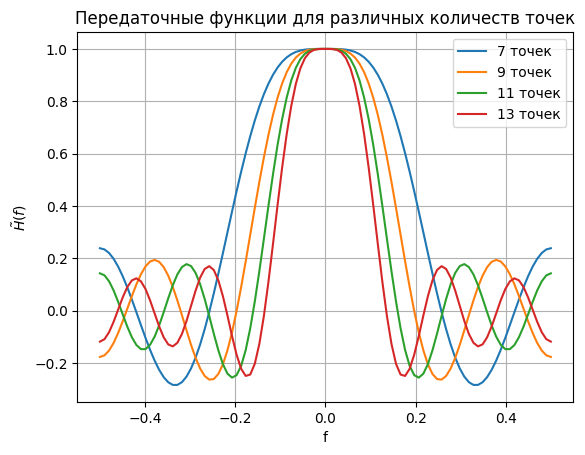

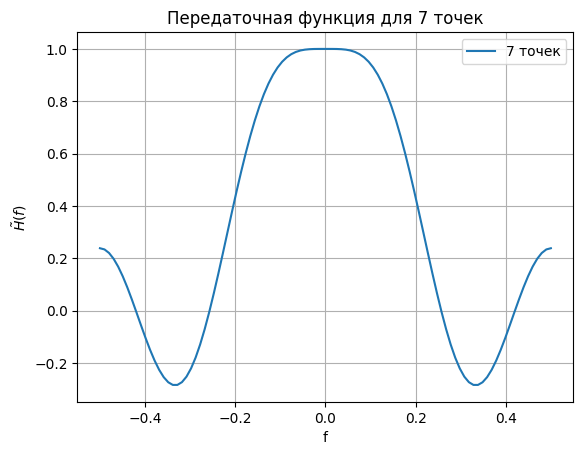

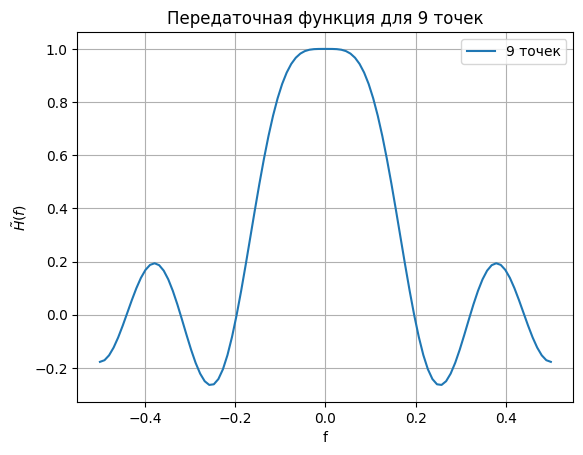

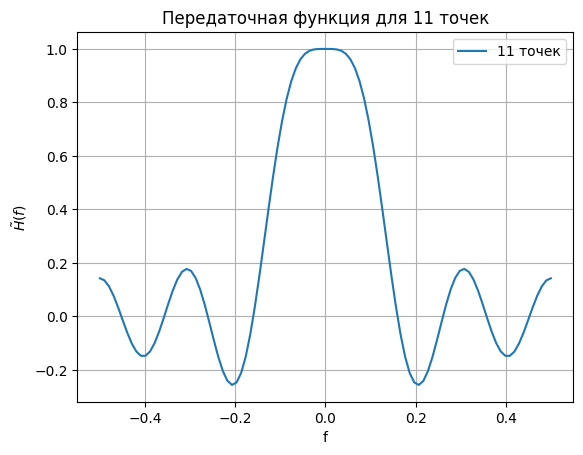

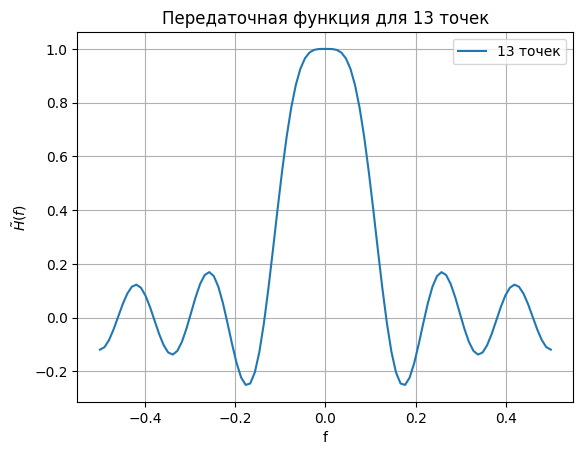

In [192]:
square_coeefs7 = [-2/21, 3/21, 6/21,
                    7/21,
                    6/21, 3/21, -2/21]
square_coeefs9 = [-21/231, 14/231, 39/231, 54/231,
                    59/231,
                    54/231, 39/231, 14/231, -21/231]
square_coeefs11 = [-36/429, 9/429, 44/429, 69/429, 84/429,
                    89/429,
                    84/429, 69/429, 44/429, 9/429, -36/429]
square_coeefs13 = [-11/143, 0, 9/143, 16/143, 21/143, 24/143,
                    25/143,
                    24/143, 21/143, 16/143, 9/143, 0, -11/143]
square_trans_func7 = build_transfer_function(square_coeefs7, number_dots=7)
square_trans_func9 = build_transfer_function(square_coeefs9, number_dots=9)
square_trans_func11 = build_transfer_function(square_coeefs11, number_dots=11)
square_trans_func13 = build_transfer_function(square_coeefs13, number_dots=13)
transfer_functions = [square_trans_func7, square_trans_func9, square_trans_func11, square_trans_func13]
number_dots_list = [7, 9, 11, 13]

plot_log_functions(transfer_functions, number_dots_list)
plot_log_function(square_trans_func7, 7)
plot_log_function(square_trans_func9, 9)
plot_log_function(square_trans_func11, 11)
plot_log_function(square_trans_func13, 13)

7 точек.
Сглаживание по 7 точкам имеет наиболее широкий купол основного максимума и имеет 4 нуля (в рамках нашего диапазона f).

9 точек.
Сглаживание по 9 точкам имеет более узкий купол основного максимума и имеет 6 нулей (в рамках нашего диапазона f).

11 точек.
Сглаживание по 11 точкам имеет еще более узкий купол основного максимума и имеет 8 нулей (в рамках нашего диапазона f).

13 точек.
Сглаживание по 13 точкам имеет наиболее узкий купол основного максимума и имеет 10 нулей (в рамках нашего диапазона f).

### Задание 3.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть $ s(t) $ - входной сигнал, $ y(t) = A + Bt + Сt^2 + Dt^3 + Et^4 $ - выходной сигнал. Хотим подобрать такие значения (A, B, C, D, E), чтобы выходной сигнал $ y(t) $ максимально соответствовал значению входного сигнала $ s(t) $ по его $2m+1$ точкам. Для этого будем минимизировать следующую функцию ошибки (проводить приближение в смысле МНК):

$$ F(A, B) = \sum_{k=-m}^{k=m} (s_k - y_k)^2 = \sum_{k=-m}^{k=m} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \rightarrow min $$

Для того, чтобы найти подходящие значения параметров A, B, C, D, E найдем частные производные и приравняем к 0.

По аналогии с предыдущим заданием, так как хотим сгладить значение в точке n выходного сигнала по входным m точкам, то нас будет интересовать только центральное значение y(0).

Получим линейную комбинацию входных сигналов, вынесем центральную экспоненту, воспользуемся формулой Эйлера. Получим формулы передаточных функций, представленные ниже (вывод коэффициентов осуществлен в коде программы):

Для 9 точек: $ \tilde{H}(f) = \frac{1}{429} (179 + 270\cos(2 \pi f ) + 60 \cos(4 \pi f) - 110 \cos(6 \pi f) + 30 \cos(8 \pi f)) $

Для 11 точек: $ \tilde{H}(f) = \frac{1}{429} (143 + 240\cos(2 \pi f ) + 120 \cos(4 \pi f) - 20 \cos(6 \pi f) - 90 \cos(8 \pi f) + 36 \cos(10 \pi f)) $

Для 13 точек: $ \tilde{H}(f) = \frac{1}{2431} (677 + 1200\cos(2 \pi f ) + 780 \cos(4 \pi f) + 220 \cos(6 \pi f) - 270 \cos(8 \pi f) - 396 \cos(10 \pi f) + 220 \cos(12 \pi f)) $

Для 15 точек: $ \tilde{H}(f) = \frac{1}{46189} (11063 + 20250\cos(2 \pi f ) + 15000 \cos(4 \pi f) + 7510 \cos(6 \pi f) - 330 \cos(8 \pi f) - 5874 \cos(10 \pi f) - 5720 \cos(12 \pi f) + 4290 \cos(14 \pi f) ) $

In [193]:
A, B, C, D, E = sp.symbols('A B C D E')
y = A + B*t + C*t**2 + D*t**3 + E*t**4
get_yn(model=y, params=(A, B, C, D, E), number_dots=9)
get_yn(model=y, params=(A, B, C, D, E), number_dots=11)
get_yn(model=y, params=(A, B, C, D, E), number_dots=13)
get_yn(model=y, params=(A, B, C, D, E), number_dots=15)

Общая формула сглаживания для yn = A + B*t + C*t**2 + D*t**3 + E*t**4 по 9 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 + D*t**3 + E*t**4 по 11 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 + D*t**3 + E*t**4 по 13 точкам имеет вид:


<IPython.core.display.Math object>

Общая формула сглаживания для yn = A + B*t + C*t**2 + D*t**3 + E*t**4 по 15 точкам имеет вид:


<IPython.core.display.Math object>

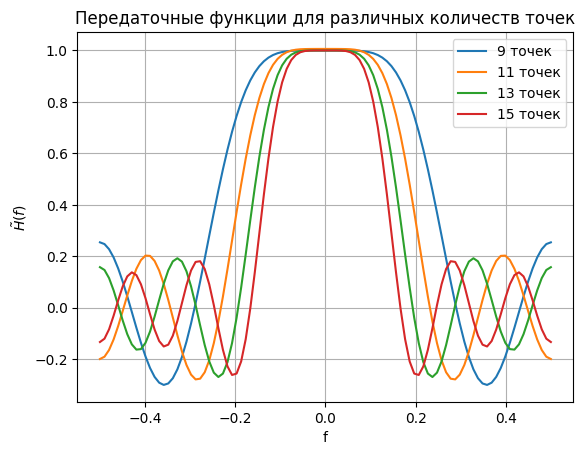

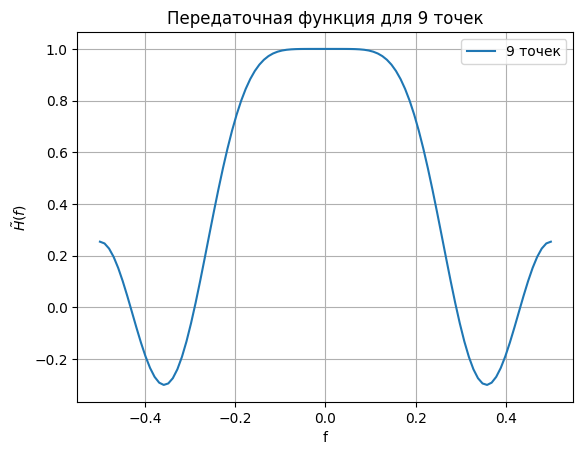

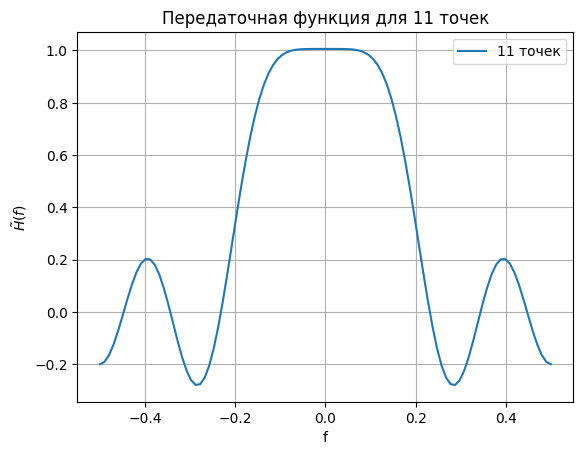

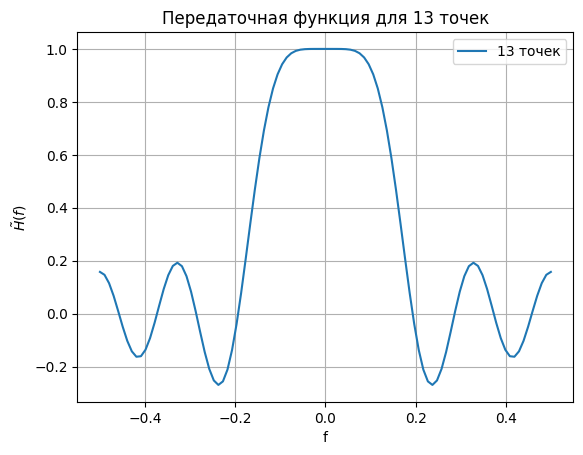

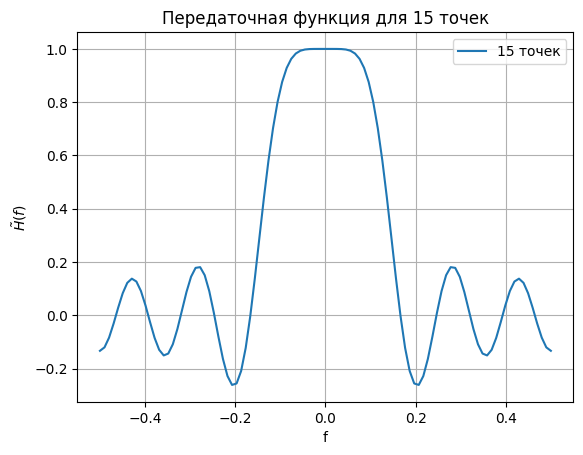

In [194]:

fourth_coeefs9 = [15/429, -55/429, 30/429, 135/429,
                  179/429,
                  135/429, 30/429, -55/429, 15/429]
fourth_coeefs11 = [18/429, -45/429, -10/429, 60/429, 120/420,
                   143/429,
                   120/429, 60/429, -10/429, -45/429, 18/429]
fourth_coeefs13 = [110/2431, -198/2431, -135/2431, 110/2431, 390/2431, 600/2431,
                   677/2431,
                   600/2431, 390/2431, 110/2431, -135/2431, -198/2431, 110/2431]
fourth_coeefs15 = [2145/46189, -2860/46189, -2937/46189, -165/46189, 3755/46189, 7500/46189, 10125/46189,
                   11063/46189,
                   10125/46189, 7500/46189, 3755/46189, -165/46189, -2937/46189, -2860/46189, 2145/46189]
fourth_trans_func9 = build_transfer_function(fourth_coeefs9, number_dots=9)
fourth_trans_func11 = build_transfer_function(fourth_coeefs11, number_dots=11)
fourth_trans_func13 = build_transfer_function(fourth_coeefs13, number_dots=13)
fourth_trans_func15 = build_transfer_function(fourth_coeefs15, number_dots=15)
transfer_functions = [fourth_trans_func9, fourth_trans_func11, fourth_trans_func13, fourth_trans_func15]
number_dots_list = [9, 11, 13, 15]

plot_log_functions(transfer_functions, number_dots_list)
plot_log_function(fourth_trans_func9, 9)
plot_log_function(fourth_trans_func11, 11)
plot_log_function(fourth_trans_func13, 13)
plot_log_function(fourth_trans_func15, 15)

9 точек.
Сглаживание по 9 точкам имеет наиболее купол основного максимума и имеет 4 нуля (в рамках нашего диапазона f).

11 точек.
Сглаживание по 11 точкам имеет более узкий купол основного максимума и имеет 6 нулей (в рамках нашего диапазона f).

13 точек.
Сглаживание по 13 точкам имеет еще более узкий купол основного максимума и имеет 8 нулей (в рамках нашего диапазона f).

15 точек.
Сглаживание по 15 точкам имеет наиболее узкий купол основного максимума и имеет 10 нулей (в рамках нашего диапазона f).

### Задание 4.

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формулы Спенсера:
    
Для 15 точек: $ y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} -6 s_{n+6} - 3s_{n+7} ) $

Для 21 точки: $ y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + ... ) $

Основываясь на рассуждениях предыдущих заданий, легко выразить формулы передаточных функций:

Для 15 точек: $ \tilde{H}(f) = \frac{1}{320} (74 + 134\cos(2 \pi f ) + 92 \cos(4 \pi f) + 42 \cos(6 \pi f) + 6 \cos(8 \pi f) - 10 \cos(10 \pi f) - 12 \cos(12 \pi f) - 6 \cos(14 \pi f) ) $

Для 21 точки: $ \tilde{H}(f) = \frac{1}{350} (60 + 114\cos(2 \pi f ) + 94 \cos(4 \pi f) + 66 \cos(6 \pi f) + 36 \cos(8 \pi f) + 12 \cos(10 \pi f) - 4 \cos(12 \pi f) - 10 \cos(14 \pi f) - 10 \cos(16 \pi f) - 6 \cos(18 \pi f) - 2 \cos(20 \pi f) ) $

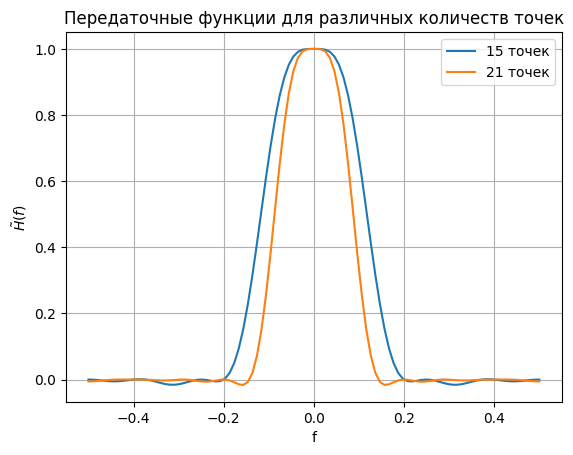

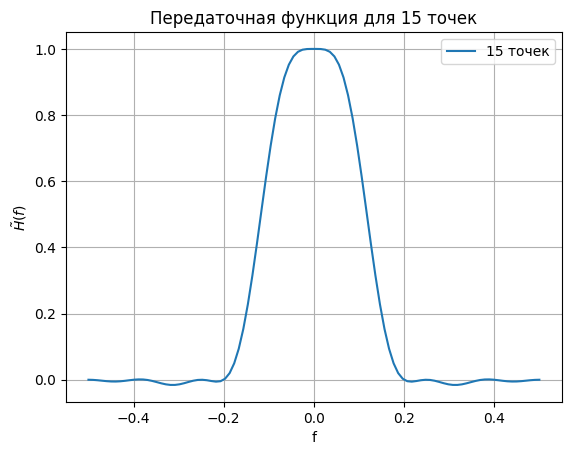

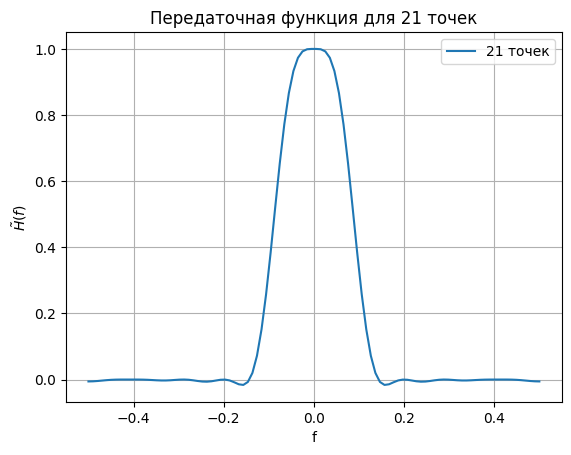

In [195]:
spenser_coeefs15 = [-3/320, -6/320, -5/320, 3/320, 21/320, 46/320, 67/320,
                    74/320,
                    67/320, 46/320, 21/320, 3/320, -5/320, -6/320, -3/320]
spenser_coeefs21 = [-1/350, -3/350, -5/350, -5/350, -2/350, 6/350, 18/350, 33/350, 47/350, 57/350,
                    60/350,
                    57/350, 47/350, 33/350, 18/350, 6/350, -2/350, -5/350, -5/350, -3/350, -1/350]
spenser_trans_func15 = build_transfer_function(spenser_coeefs15, number_dots=15)
spenser_trans_func21 = build_transfer_function(spenser_coeefs21, number_dots=21)
transfer_functions = [spenser_trans_func15, spenser_trans_func21]
number_dots_list = [15, 21]

plot_log_functions(transfer_functions, number_dots_list)
plot_log_function(spenser_trans_func15, 15)
plot_log_function(spenser_trans_func21, 21)

15 точек. Сглаживание по 15 точкам имеет более широкий купол основного максимума, по сровнению со сглаживанием по 21 точку. Количество нулей - 14.  
21 точек. Сглаживание по 21 точке имеет более узкий купол основного максимума, по сровнению со сглаживанием по 15 точкам. Количество нулей - 20.

### Задание 5.
Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

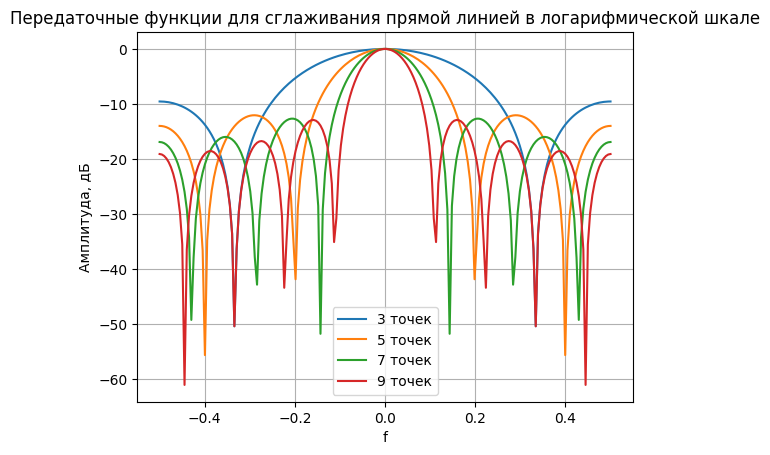

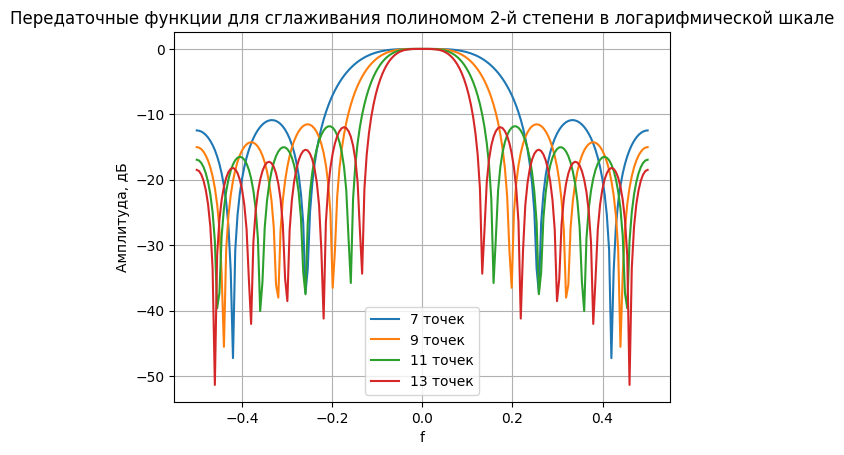

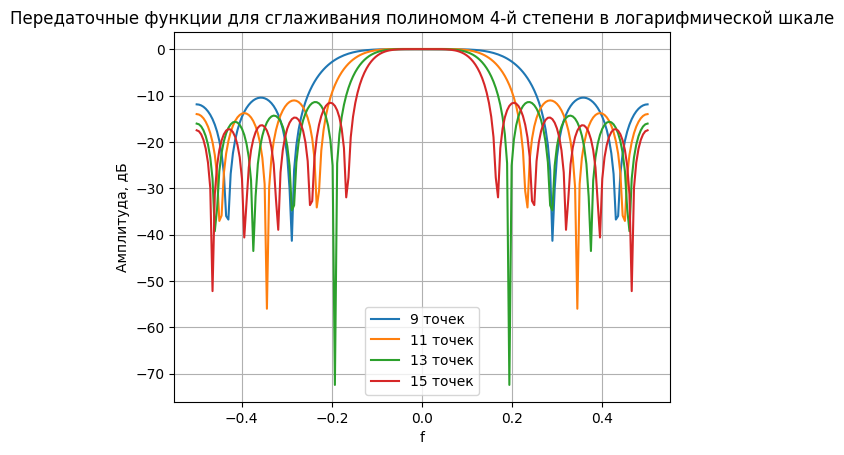

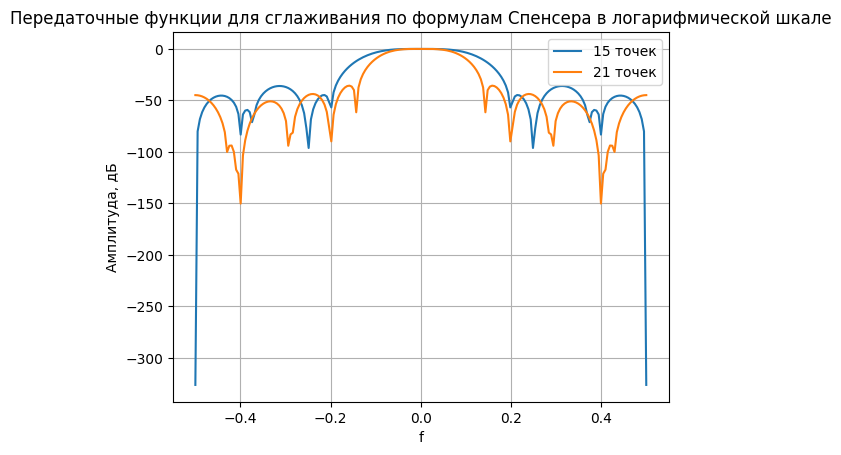

In [196]:
def plot_log_function(transfer_function, number_dots: int):
    '''
    transfer_function: передаточная функция
    number_dots: количество точек, используемых для приближения
    '''
    f_values = np.linspace(-0.5, 0.5, 200)
    transfer_function_values = [float(transfer_function.subs(f, f_val)) for f_val in f_values]
    transfer_function_values_db = 20 * np.log10(np.abs(transfer_function_values))

    plt.figure()
    plt.plot(f_values, transfer_function_values_db, label=f'{number_dots} точек')
    plt.xlabel('f')
    plt.ylabel('Амплитуда, дБ')
    plt.title(f'Передаточная функция для {number_dots} точек в логарифмической шкале')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_log_functions(transfer_functions, number_dots_list, title):
    '''
    transfer_functions: список передаточных функций
    number_dots_list: список количеств точек, используемых для приближения
    '''
    f_values = np.linspace(-0.5, 0.5, 200)

    plt.figure()
    for transfer_function, number_dots in zip(transfer_functions, number_dots_list):
        transfer_function_values = [float(transfer_function.subs(f, f_val)) for f_val in f_values]
        transfer_function_values_db = 20 * np.log10(np.abs(transfer_function_values))
        plt.plot(f_values, transfer_function_values_db, label=f'{number_dots} точек')

    plt.xlabel('f')
    plt.ylabel('Амплитуда, дБ')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
transfer_functions = [linear_trans_func3, linear_trans_func5, linear_trans_func7, linear_trans_func9]
number_dots_list = [3, 5, 7, 9]
plot_log_functions(transfer_functions, number_dots_list, 'Передаточные функции для сглаживания прямой линией в логарифмической шкале')

transfer_functions = [square_trans_func7, square_trans_func9, square_trans_func11, square_trans_func13]
number_dots_list = [7, 9, 11, 13]
plot_log_functions(transfer_functions, number_dots_list, 'Передаточные функции для сглаживания полиномом 2-й степени в логарифмической шкале')

transfer_functions = [fourth_trans_func9, fourth_trans_func11, fourth_trans_func13, fourth_trans_func15]
number_dots_list = [9, 11, 13, 15]
plot_log_functions(transfer_functions, number_dots_list, 'Передаточные функции для сглаживания полиномом 4-й степени в логарифмической шкале')

transfer_functions = [spenser_trans_func15, spenser_trans_func21]
number_dots_list = [15, 21]
plot_log_functions(transfer_functions, number_dots_list, 'Передаточные функции для сглаживания по формулам Спенсера в логарифмической шкале')

Графики, построенные в логарифмической шкале отличаются от графиков в линейной шкале тем, что в линейной отображается абсолютные значения, тогда как в логарифмической лучше видны соотношения амлитуд на различных частотах, а также лучше видны мелкие изменения высоких частот.

### Задание 6.
Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Сравнительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.
1. Ширина купола главного максимума:  
a. Линейное сглаживание: Самая узкая ширина купола главного максимума. Ширина уменьшается с увеличением числа точек (3 < 5 < 7 < 9).  
b. Полином 2-й степени: Ширина больше, чем у линейного сглаживания с тем же количеством точек. Увеличивается с ростом числа точек (7 < 9 < 11 < 13).  
c. Полином 4-й степени: Ширина ещё больше, чем у полинома 2-й степени. Увеличивается с ростом числа точек (9 < 11 < 13 < 15).  
d. Спенсер: Ширина сопоставима или немного больше, чем у линейного сглаживания с аналогичным количеством точек. Увеличивается с ростом числа точек (15 < 21).

2. Амплитуда пика:  
Все методы: Амплитуда пика равна 1 для всех методов

3. Скорость затухания боковых куполов:  
a. Линейное сглаживание: Самое медленное затухание, значительные колебания.  
b. Полином 2-й степени: Затухание быстрее, чем у линейного сглаживания, но всё ещё заметны колебания.  
c. Полином 4-й степени: Затухание быстрее, чем у полинома 2-й степени.  
d. Спенсер: Самое быстрое затухание, минимальные колебания.   

## Выводы

В ходе проведения лабораторной работы изучено:
1. Построение передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.
2. Построение передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам.
3. Построение передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 9, 11, 13 и 15 точкам.
4. Построение передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формуле Спенсера по 15 и 21 точкам.

Для каждой функции построены графики в линейной и логарифмической шкалах.
Использование логарифмической шкалы позволило более наглядно оценить соотношение амплитуд на разных частотах и выявить небольшие изменения на высоких частотах.

По графикам сделаны выводы:
1. При росте количества точек ширина купола основного максимума уменьшается
2. При повышении степени полинома сглаживания увеличивается ширина купола осного максимума, однако затухание увеличивается
3. График передаточной функции по формуле Спенсора продемонстрировал самое быстрое затухание и минимальные колебания.
